Exploratory Data Analysis(EDA)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset 
data = pd.read_csv('ToyotaCorolla - MLR.csv')

# Summary statistics
print(data.describe())



              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [12]:
print(data.columns)



Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


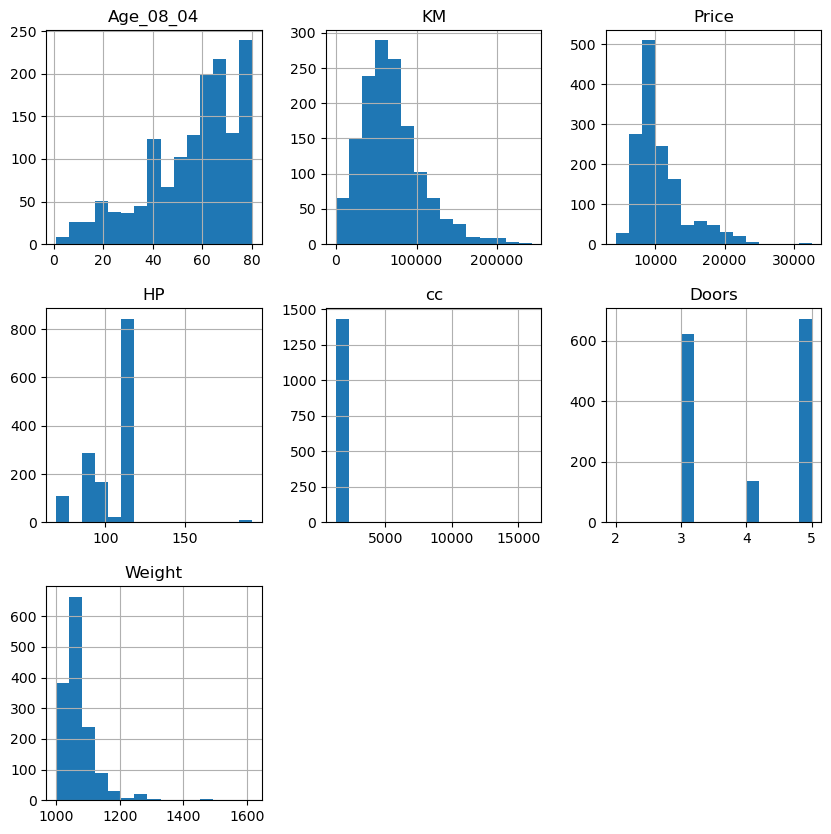

In [16]:
# Histogram for continuous variables
data[['Age_08_04', 'KM', 'Price', 'HP', 'cc', 'Doors', 'Weight']].hist(bins=15, figsize=(10, 10))
plt.show()



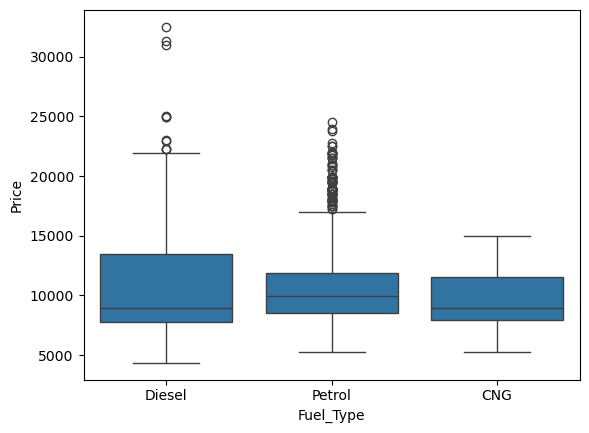

In [18]:
# Boxplot for categorical variables (for example, Fuel_Type)
sns.boxplot(x='Fuel_Type', y='Price', data=data)
plt.show()


In [22]:
# Convert 'Fuel_Type' and 'Automatic' to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['Fuel_Type', 'Automatic'], drop_first=True)

# Verify the new columns after encoding
print(data.columns)


Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Automatic_1'],
      dtype='object')


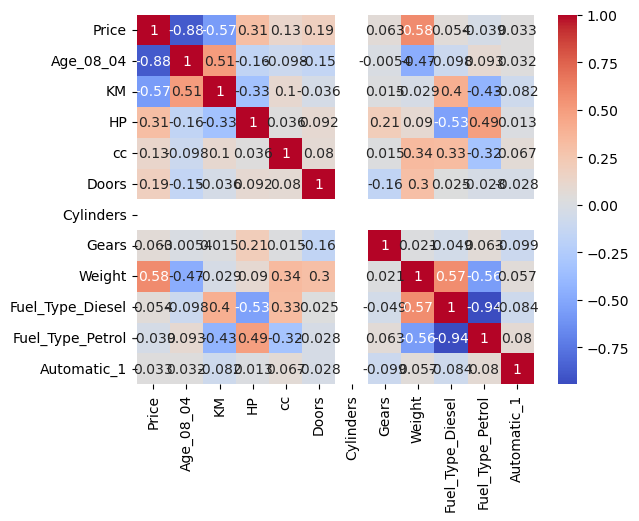

      Price  Age_08_04     KM   HP    cc  Doors  Cylinders  Gears  Weight  \
0     13500         23  46986   90  2000      3          4      5    1165   
1     13750         23  72937   90  2000      3          4      5    1165   
2     13950         24  41711   90  2000      3          4      5    1165   
3     14950         26  48000   90  2000      3          4      5    1165   
4     13750         30  38500   90  2000      3          4      5    1170   
...     ...        ...    ...  ...   ...    ...        ...    ...     ...   
1431   7500         69  20544   86  1300      3          4      5    1025   
1432  10845         72  19000   86  1300      3          4      5    1015   
1433   8500         71  17016   86  1300      3          4      5    1015   
1434   7250         70  16916   86  1300      3          4      5    1015   
1435   6950         76      1  110  1600      5          4      5    1114   

      Fuel_Type_Diesel  Fuel_Type_Petrol  Automatic_1  
0                 T

In [28]:
# Correlation matrix for the updated dataset
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)
print(data)


Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MLR Model1

In [66]:
from sklearn.linear_model import LinearRegression

# Model 1: Baseline model using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Print coefficients of model 1
coefficients_model1 = pd.DataFrame(model1.coef_, X_train.columns, columns=['Coefficient'])
print("Model 1 Coefficients:")
print(coefficients_model1)


Model 1 Coefficients:
                   Coefficient
Age_08_04        -1.591507e-03
KM                1.035632e-02
HP                6.527423e+00
cc               -2.967023e-02
Doors            -9.200588e+01
Cylinders         3.126388e-13
Gears             4.898875e+02
Weight            3.902162e+01
Fuel_Type_Diesel -9.666290e+02
Fuel_Type_Petrol  1.695865e+03
Automatic_1      -4.935969e+02
Age_KM            5.071568e-09


Model Evaluation

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions for Model 1
y_pred1 = model1.predict(X_test)

# Evaluate Model 1
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1 - RMSE: {rmse1}, R-squared: {r2_1}")


Model 1 - RMSE: 5724.419914162914, R-squared: -1.4559320946709695


In [74]:
# Model 2: Feature selection (dropping some features)
X_train_reduced = X_train.drop(['KM', 'Doors'], axis=1)  # Specify the features to drop
X_test_reduced = X_test.drop(['KM', 'Doors'], axis=1)

model2 = LinearRegression()
model2.fit(X_train_reduced, y_train)

# Print coefficients of model 2
coefficients_model2 = pd.DataFrame(model2.coef_, X_train_reduced.columns, columns=['Coefficient'])
print("\nModel 2 Coefficients (After Feature Selection):")
print(coefficients_model2)



Model 2 Coefficients (After Feature Selection):
                   Coefficient
Age_08_04        -1.504560e-03
HP                8.198207e+00
cc               -3.758666e-02
Cylinders         9.876544e-13
Gears             6.020356e+02
Weight            3.766002e+01
Fuel_Type_Diesel -8.523982e+02
Fuel_Type_Petrol  1.466506e+03
Automatic_1      -4.690894e+02
Age_KM            5.261705e-09


In [76]:
# Model 3: Adding interaction term (e.g., Age * KM)
X_train['Age_KM'] = X_train['Age_08_04'] * X_train['KM']  # Make sure the column name matches
X_test['Age_KM'] = X_test['Age_08_04'] * X_test['KM']

model3 = LinearRegression()
model3.fit(X_train, y_train)

# Print coefficients of model 3
coefficients_model3 = pd.DataFrame(model3.coef_, X_train.columns, columns=['Coefficient'])
print("\nModel 3 Coefficients (With Interaction Term):")
print(coefficients_model3)



Model 3 Coefficients (With Interaction Term):
                   Coefficient
Age_08_04        -1.591507e-03
KM                1.035632e-02
HP                6.527423e+00
cc               -2.967023e-02
Doors            -9.200588e+01
Cylinders         3.126388e-13
Gears             4.898875e+02
Weight            3.902162e+01
Fuel_Type_Diesel -9.666290e+02
Fuel_Type_Petrol  1.695865e+03
Automatic_1      -4.935969e+02
Age_KM            5.071568e-09


In [78]:
# Predictions for each model
y_pred2 = model2.predict(X_test_reduced)
y_pred3 = model3.predict(X_test)

# Evaluate Model 2
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2 - RMSE: {rmse2}, R-squared: {r2_2}")

# Evaluate Model 3
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3 - RMSE: {rmse3}, R-squared: {r2_3}")


Model 2 - RMSE: 5234.721148718336, R-squared: -1.053716492543745
Model 3 - RMSE: 5724.419914162914, R-squared: -1.4559320946709695


In [80]:
from sklearn.linear_model import Lasso, Ridge



Lasso Regression

In [83]:
# Lasso Regression
lasso_model = Lasso(alpha=0.5)  # You can adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso Model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - RMSE: {rmse_lasso}, R-squared: {r2_lasso}")

# Print coefficients of Lasso model
coefficients_lasso = pd.DataFrame(lasso_model.coef_, X_train.columns, columns=['Coefficient'])
print("\nLasso Model Coefficients:")
print(coefficients_lasso)


Lasso Regression - RMSE: 5722.778862312564, R-squared: -1.4545241846040784

Lasso Model Coefficients:
                   Coefficient
Age_08_04        -1.591397e-03
KM                1.029002e-02
HP                6.866436e+00
cc               -3.191620e-02
Doors            -9.053516e+01
Cylinders         0.000000e+00
Gears             4.780781e+02
Weight            3.890042e+01
Fuel_Type_Diesel -9.422415e+02
Fuel_Type_Petrol  1.691041e+03
Automatic_1      -4.806599e+02
Age_KM            5.072334e-09


In [85]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust alpha for regularization strength
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - RMSE: {rmse_ridge}, R-squared: {r2_ridge}")

# Print coefficients of Ridge model
coefficients_ridge = pd.DataFrame(ridge_model.coef_, X_train.columns, columns=['Coefficient'])
print("\nRidge Model Coefficients:")
print(coefficients_ridge)


Ridge Regression - RMSE: 5723.625470346134, R-squared: -1.4552504658918233

Ridge Model Coefficients:
                   Coefficient
Age_08_04        -1.591371e-03
KM                1.033469e-02
HP                6.578211e+00
cc               -2.999291e-02
Doors            -9.178807e+01
Cylinders         0.000000e+00
Gears             4.891354e+02
Weight            3.900039e+01
Fuel_Type_Diesel -9.670699e+02
Fuel_Type_Petrol  1.690167e+03
Automatic_1      -4.921256e+02
Age_KM            5.071449e-09


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.70849e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Interview Questions:

In [ ]:
What techniques can be used to address multicollinearity in multiple linear regression?

Variance Inflation Factor (VIF): Detect and remove/reduce multicollinearity.
Ridge Regression: Shrinks coefficients to reduce the effect of multicollinearity.
Principal Component Analysis (PCA): Reduce dimensionality by combining correlated features into independent components.
